<a href="https://colab.research.google.com/github/PaulNjinu254/Ensemble-Learning-Series/blob/main/Ensemble_Learning_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving train.csv to train (2).csv

 Ensemble Model Comparison (MSE on Validation Set):
1. Blending MSE: 2820583641.21
2. Bagging MSE:  1511543115.76
3. Stacking MSE: 1964106477.91


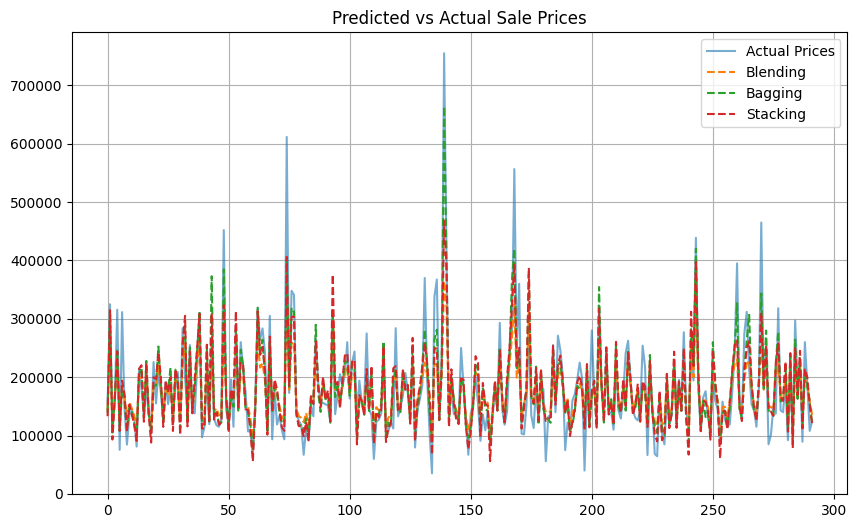

In [4]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
from io import BytesIO
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor, StackingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 2: Upload the file
from google.colab import files
uploaded = files.upload()
data = pd.read_csv('train.csv')

# Step 3: Load the uploaded train.csv file
filename = next(iter(uploaded))  # get the uploaded file name
data = pd.read_csv(BytesIO(uploaded[filename]))

# Step 4: Use selected features and split data
X = data[['GrLivArea', 'YearBuilt']]
y = data['SalePrice']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=42)

# Optional: Standardize features for SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# Blending implementation
# Train base models
linreg = LinearRegression().fit(X_train, y_train)
svm = SVR(kernel='rbf').fit(X_train_scaled, y_train)
tree = DecisionTreeRegressor(max_depth=5).fit(X_train, y_train)

# Predict and blend (equal weights)
pred_lin = linreg.predict(X_valid)
pred_svm = svm.predict(X_valid_scaled)
pred_tree = tree.predict(X_valid)

blend_pred = (pred_lin + pred_svm + pred_tree) / 3
blend_mse = mean_squared_error(y_valid, blend_pred)

# Bagging implementation
bag_model = BaggingRegressor(
    estimator=DecisionTreeRegressor(max_depth=5),
    n_estimators=10,
    random_state=42
).fit(X_train, y_train)

bag_pred = bag_model.predict(X_valid)
bag_mse = mean_squared_error(y_valid, bag_pred)

# Stacking implementation
stack_model = StackingRegressor(
    estimators=[
        ('lr', LinearRegression()),
        ('svm', SVR(kernel='rbf')),
        ('dt', DecisionTreeRegressor(max_depth=5))
    ],
    final_estimator=LinearRegression()
).fit(X_train_scaled, y_train)

stack_pred = stack_model.predict(X_valid_scaled)
stack_mse = mean_squared_error(y_valid, stack_pred)

# Results comparison
print("\n Ensemble Model Comparison (MSE on Validation Set):")
print(f"1. Blending MSE: {blend_mse:.2f}")
print(f"2. Bagging MSE:  {bag_mse:.2f}")
print(f"3. Stacking MSE: {stack_mse:.2f}")

# Optional: Visualize predictions
plt.figure(figsize=(10, 6))
plt.plot(y_valid.values, label='Actual Prices', alpha=0.6)
plt.plot(blend_pred, label='Blending', linestyle='--')
plt.plot(bag_pred, label='Bagging', linestyle='--')
plt.plot(stack_pred, label='Stacking', linestyle='--')
plt.title("Predicted vs Actual Sale Prices")
plt.legend()
plt.grid(True)
plt.show()
